# Hotel Booking System & Database Pipeline

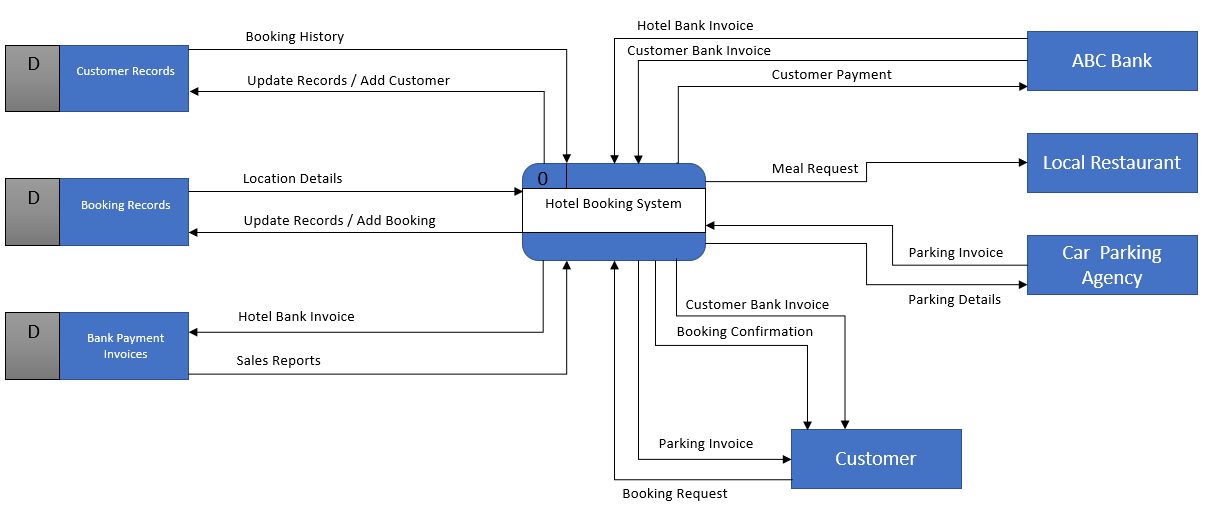
Level 0 Context Diagram


Level 1 DFD


Level 2 DFD

## Analysing the Dataset

In [3]:
import pandas as pd
data = pd.read_csv('Hotel Booking Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           2571 non-null   object
 1   is_canceled                     2571 non-null   int64 
 2   lead_time                       2571 non-null   int64 
 3   arrival_date_year               2571 non-null   int64 
 4   arrival_date_month              2571 non-null   object
 5   arrival_date_day_of_month       2571 non-null   int64 
 6   stays_in_weekend_nights         2571 non-null   int64 
 7   stays_in_week_nights            2571 non-null   int64 
 8   adults                          2571 non-null   int64 
 9   children                        2571 non-null   int64 
 10  babies                          2571 non-null   int64 
 11  meal                            2571 non-null   object
 12  country                         2570 non-null   

By default, the dataset comes in the First Normal form consiting of unique columns. However, the reason it is not in 2NF is because it has not got a primary key in multiple different tables. The first task to normalise the data would be to seperate the columns into relevant tables such as a customers and booking table. The case scenario specifies the requirement of a customer details and booking records database to be implemented but others may also be introduced when splitting to 2NF.

In [1]:
import sqlalchemy
sqlalchemy.__version__

'1.4.7'

In [2]:
from sqlalchemy import create_engine
from sqlalchemy.types import Integer, Text, String, DateTime, Float
engine = create_engine('sqlite:///test.db')

In [10]:
# Creating the Database objects
customer_details = data.filter(['customer_type', 'is_repeated_guest', ])
booking_records = data.filter(['hotel', 'Booking Agent', 'deposit_type', 'adults', 'children', 'babies'])
#bank_payment_invoice

In [11]:
booking_records.head()

,Booking Agent,deposit_type,adults,children,babies
0,Direct,No Deposit,2,0,0
1,Direct,No Deposit,2,0,0
2,Direct,No Deposit,1,0,0
3,Corporate,No Deposit,1,0,0
4,Online TA,No Deposit,2,0,0


In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,reservation_status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0,...,0,0,C,C,3,No Deposit,0,Transient,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0,...,0,0,C,C,4,No Deposit,0,Transient,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0,...,0,0,A,C,0,No Deposit,0,Transient,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0,...,0,0,A,A,0,No Deposit,0,Transient,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0,...,0,0,A,A,0,No Deposit,0,Transient,0,Check-Out


In [9]:
#data_acids = data.filter(['fixed acidity', 'volatile acidity', 'chlorides', 'sulphates'])
#data_acids.head()

,fixed acidity,volatile acidity,chlorides,sulphates
0,7.4,0.70,0.076,0.56
1,7.8,0.88,0.098,0.68
2,7.8,0.76,0.092,0.65
3,11.2,0.28,0.075,0.58
4,7.4,0.70,0.076,0.56


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

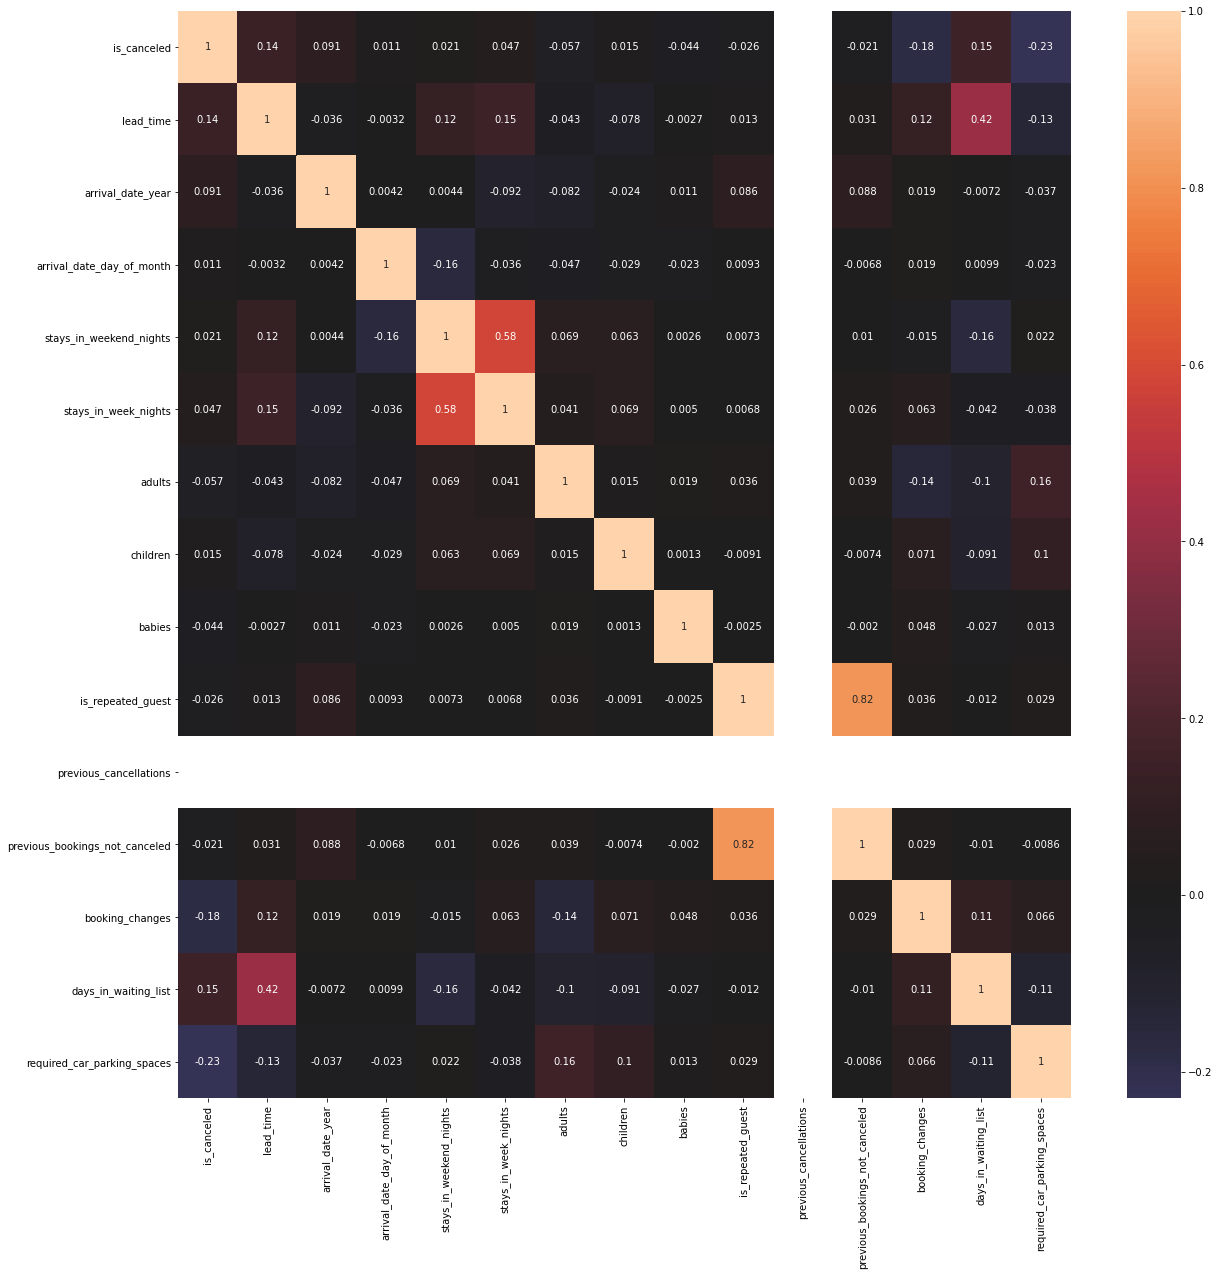

In [9]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True,center=0)

In [10]:
data_acids.to_sql(
    "Acids",
    engine,
    if_exists='replace',
    index=False,
    chunksize=500
    )

In [11]:
table_name = "Wine Data"

data.to_sql(
    table_name,
    engine,
    if_exists='replace',
    index = False,
    chunksize=500,
    dtype={
        "fixed acidity" : Float,
        "volatile acidity" : Float,
        "citric acid" : Float,
        "residual sugar" : Float,
        "chlorides" : Float
    }
)

In [12]:
table_df = pd.read_sql_table(table_name, con=engine)

In [13]:
table_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [11]:
#from tkinter import *
#from tkinter import ttk
#root = Tk()
#frm = ttk.Frame(root, padding=10)
#frm.grid()
#ttk.Label(frm, text="Hello World!").grid(column=0, row=0)
#ttk.Button(frm, text="Quit", command=root.destroy).grid(column=1, row=0)
#root.mainloop()
